In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import rcParams
import celerite
from celerite import terms
from celerite.modeling import Model
import warnings
warnings.filterwarnings('ignore')

import re
import jax.numpy as jnp
from jax import grad, jit, partial
import ticktack
from ticktack import fitting
from astropy.table import Table

rcParams['figure.figsize'] = (16.0, 8.0)

In [2]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')

In [3]:
cf = fitting.CarbonFitter(cbm)
cf.load_data('miyake12.csv')

In [4]:
%%time
default_params = [775., 1./12, np.pi/2., 81./12]
sampler = cf.sampling(default_params, burnin=1000, production=2000)

Running burn-in...


  0%|          | 0/2000 [00:00<?, ?it/s]

Running production...


100%|██████████| 2000/2000 [05:47<00:00,  5.75it/s]

CPU times: user 8min 27s, sys: 2min 45s, total: 11min 12s
Wall time: 8min 45s


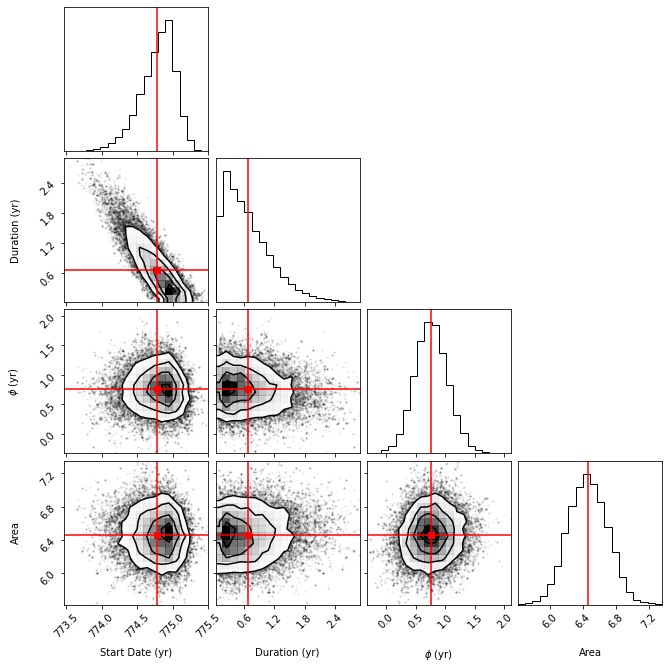

In [5]:
cf.corner_plot(sampler, labels=[r"Start Date (yr)", r"Duration (yr)", r"$\phi$ (yr)", r"Area"])

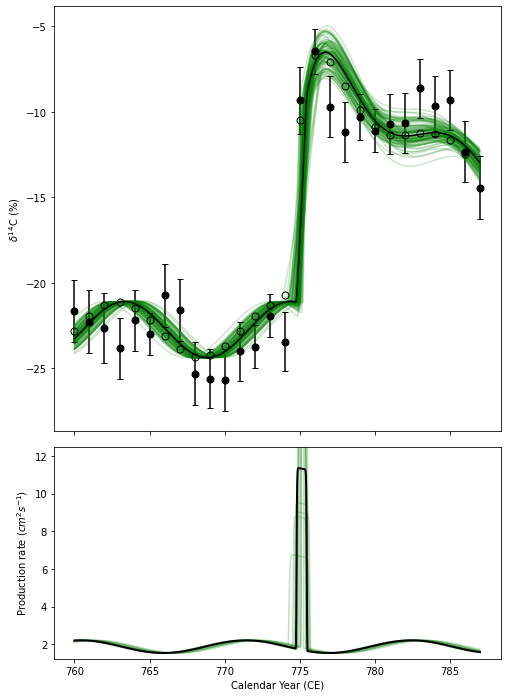

In [6]:
cf.plot_samples(sampler)